teta
[-3.0709068188840227, -1.4765485471872024, 0.11780972450961791, 1.7121679962064373, 3.3065262679032585, 4.900884539600078, 6.495242811296897, 8.089601082993719]
r
[4.235801032000001, 6.853526069776002, 11.089005180897573, 17.942010382692274, 29.0301727991961, 46.97081958909929, 75.99878609516266, 122.96603590197319]
La imagen se ha generado y guardado con éxito en formato pdf.


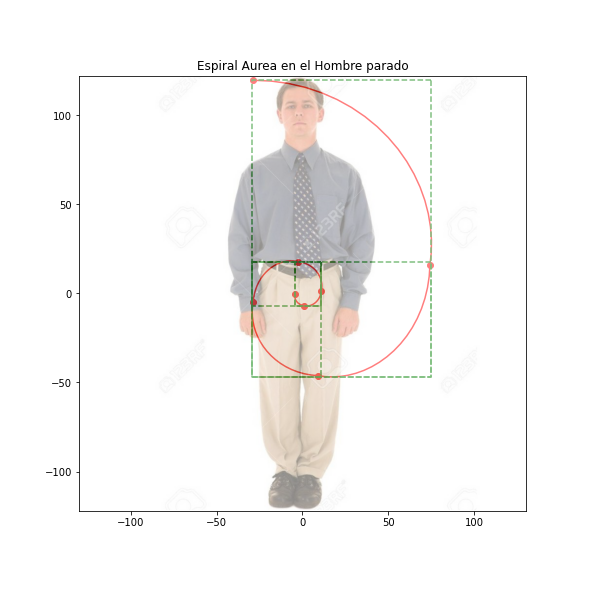

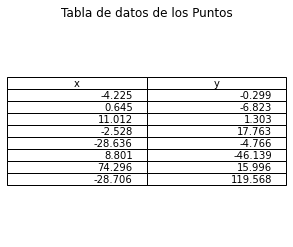

In [2]:
#Importamos las librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import matplotlib.patches as pat
import ipywidgets as pwd
import sys
from scipy.optimize import curve_fit
from IPython.display import display,clear_output
from matplotlib.backends.backend_pdf import PdfPages
######################################################################
############# Creamos la Clase donde guardaremos los datos ##########
####################################################################
class Cuerpo:
    def __init__(self,A,B):
        self.Labels=['Altura/pies-ombligo','pies-ombligo/frente-ombligo']
        self.A=A
        self.B=B
        self.Aureo=[1.6180,1.6180]
        self.Err=[]
        
    def Proportions(self):
        Prop=[]
        a=self.A
        b=self.B
        for i in range(len(self.A)):
            div=a[i]/b[i]
            Prop.append(div)
        return Prop
    def Errores(self):
        Error_Abs=[]
        Error_Rel=[]
        Error_Por=[]
        Prop=self.Proportions()
        for i in range(len(self.A)):
            Er_abs=abs(Prop[i]-1.6180)
            Error_Abs.append(Er_abs)
            Er_rel=Er_abs/1.6180
            Error_Rel.append(Er_rel)
            Er_por=Er_rel*100
            Error_Por.append(Er_por)
        Errors=[Error_Abs,Error_Rel,Error_Por]
        return Errors
    def get_Dataframe(self):
        Errors=self.Errores()
        df=pd.DataFrame({'Proporciones':pd.Series(self.Labels,index=['1','2']),'Medida a (cm)':self.A,
                         'Medida b (cm)':self.B,'a/b':self.Proportions(),'Numero Aureo':self.Aureo,
                 'Error Absoluto':Errors[0],'Error_Relativo':Errors[1],'Error Porcentual':Errors[2]})
        return df
    def Show_Table(self,btn):
        df=self.get_Dataframe()
        display(df)
        return
    def Imp_Table(self,btn):
        print('La siguiente tabla se ha guardado con éxito en formato pdf.')
        df=self.get_Dataframe()
        fig, ax =plt.subplots(figsize=(15,4))
        ax.axis('off')
        print(df.values)
        the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
        pp = PdfPages("table.pdf")
        pp.savefig(fig, bbox_inches='tight')
        pp.close()
        return
    def Show_Graph(self,btn):
        print('La imagen se ha generado y guardado con éxito en formato pdf.')
        a=self.A
        Labels=self.Labels
        b=self.B
        Errors=self.Errores()
        fig=plt.figure(figsize=(8,6))
        ax=fig.add_subplot(111,title='Proporción aurea en cada parte del cuerpo',ylabel='Longitud (cm)')
        ax.bar(Labels,a,0.5,label='Medida b',yerr=Errors[0])
        ax.bar(Labels,b,0.5,label='Medida a',yerr=Errors[0])
        ax.legend()
        plt.savefig("Gráfica_de_Barras.png", dpi=150)
        return

################################################

def Extraer_array(array):
    n=len(array)
    New=[]
    for i in range(3,n):
        New.append(array[i])
    return New
def Calcular_Radios(teta0,teta,radio0,radio):
    num=20
    D_teta=np.linspace(teta0,teta,num)
    Radios=np.linspace(radio0,radio,num)
    return D_teta.tolist(),Radios.tolist()
def Espiral_Polares(teta):
    r=[1]
    for i in range(len(teta)-1):
        new_r=r[i]*1.618
        r.append(new_r)
    New_teta=Extraer_array(teta)
    New_Radio=Extraer_array(r)
    teta,r=[],[]
    for i in range(len(New_teta)-1):
        teta_dot,radio=Calcular_Radios(New_teta[i],New_teta[i+1],New_Radio[i],New_Radio[i+1])
        teta=teta+teta_dot
        r=r+radio
    return teta,r,New_teta,New_Radio
def TransformToCartesianos(teta,R):
    x=[]
    y=[]
    for i in range(len(teta)):
        xi=math.cos(teta[i])*R[i]
        yi=math.sin(teta[i])*R[i]
        x.append(xi)
        y.append(yi)
    return x,y

#######################################################################
    
def Iniciar(btn):
    def Ingresar_Med(btn):
        clear_output()
        Botones_Iniciales(True)
        print('Los datos han sido ingresados exitosamente.')
        Alt=grid[0,1].value
        LOmPi=grid[1,1].value
        LOmFr=grid[2,1].value
        a=[Alt,LOmPi]
        b=[LOmPi,LOmFr]
        Data1=Cuerpo(a,b)
        ShowGrafica=pwd.Button(description='Mostrar Gráfica')
        ShowTabla=pwd.Button(description='Mostrar Tabla')
        Imprimir_Tabla=pwd.Button(description='Imprimir Tabla')
        ShowTabla.on_click(Data1.Show_Table)
        ShowGrafica.on_click(Data1.Show_Graph)
        Imprimir_Tabla.on_click(Data1.Imp_Table)
        items=[ShowTabla,ShowGrafica,Imprimir_Tabla]
        B1=pwd.Box(items)
        display(B1)
        return 
    #Ingreso de Datos
    print('Los datos que se le piden a continuación deben ser ingresados en centímetros: ')
    Medidas=['Altura de la persona:','Longitud entre los pies y el ombligo: ','Longitud entre la frente y el ombligo: ']
    grid = pwd.GridspecLayout(3, 3)
    for i in range(3):
        grid[i,0]=pwd.Label(value=Medidas[i])
        grid[i,1]=pwd.BoundedFloatText(max=200,value=50)
    display(grid)
    Aceptar=pwd.Button(description='Aceptar')
    Aceptar.on_click(Ingresar_Med)
    items=[Aceptar]
    B1=pwd.Box(items)
    display(B1)
def Main_Pag(btn):
    clear_output()
    Botones_Iniciales(True)
    Iniciar(True)
def Siguiente0(btn):
    def lineal(x,m,b):
        return m*x+b
    def graf_Ajuste(x,pars):
        y=pars[0]*x+pars[1]
        return y
    clear_output()
    Sig=pwd.Button(description='Siguiente')
    Sig.on_click(Siguiente1)
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Main_Pag)
    box=pwd.HBox([Ant,Sig])
    display(box)
    Med_A=[0,170,164,181,160,168,164,104,103,108,96,102,92]
    Med_B=[0,104,103,108,96,102,92,64,62,69,61,63,58]
    fig=plt.figure(figsize=(8,8))
    pars, cov = curve_fit(lineal, Med_B, Med_A, p0=[0, 0], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov))
    x=np.linspace(0,max(Med_B),100)
    etiqueta='y='+str(round(pars[0],3))+'x + '+str(round(pars[1],3))
    ax=fig.add_subplot(111,title='Gráfico de dispersión. Desviación Estandar='+str(round(stdevs[0],3)),xlim=(0.1,max(Med_B)+5),ylim=(0.1,max(Med_A)+5))
    ax.plot(Med_B,Med_A,'bo')
    ax.plot(x,graf_Ajuste(x,pars),'--',label=etiqueta)
    ax.grid()
    ax.legend()
    ax.set_xlabel('Medida b (cm)')
    ax.set_ylabel('Medida a (cm)')
    plt.savefig("Gráfica_de_Dispersión.png", dpi=150)
    return
def Siguiente1(btn):
    clear_output()
    Sig=pwd.Button(description='Siguiente')
    Sig.on_click(Siguiente2)
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Siguiente0)
    box=pwd.HBox([Ant,Sig])
    display(box)
    fig=plt.figure(figsize=(8,8))
    limx=130
    limy=122
    ax=fig.add_subplot(111,xlim=(-limx,limx),ylim=(-limy,limy),title='Espiral Aurea en el Hombre parado')
    teta=np.linspace(-math.pi*5/2,math.pi*2.575,11)
    teta,r,New_teta,New_Radio=Espiral_Polares(teta)
    print('teta')
    print(New_teta)
    print('r')
    print(New_Radio)
    X,Y=TransformToCartesianos(teta,r)
    Puntos_x,Puntos_y=TransformToCartesianos(New_teta,New_Radio)
    ax.plot(Puntos_x,Puntos_y,'or')
    ax.plot(X,Y,'r')
    Lista_M=[max(Y),max(X),min(Y),min(X)]
    i=0
    for j in range(len(Lista_M)+2):
        rectanguloX=[Lista_M[1],Lista_M[3],Lista_M[3],Lista_M[1],Lista_M[1]]
        rectanguloY=[Lista_M[0],Lista_M[0],Lista_M[2],Lista_M[2],Lista_M[0]]
        ax.plot(rectanguloX,rectanguloY,'g--')
        if i==3:
            Lista_M[i]=Puntos_y[len(Lista_M)-1-i]
            Lista_M[i]=Puntos_x[len(Lista_M)-1-i]
            i=0
        else:
            if (i%2)==0:
                Lista_M[i]=Puntos_y[len(Lista_M)-1-i]
            else:
                Lista_M[i]=Puntos_x[len(Lista_M)-1-i]
            i=i+1
    arr_img=plt.imread('hombre.jpg')
    axim=plt.gcf().add_axes([0,0,1,1])
    im=axim.imshow(arr_img,alpha=0.5)
    axim.axis('off')
    marco=pat.Rectangle((80,80),430,433)
    im.set_clip_path(marco)
    plt.savefig("Gráfica_Hombre_Parado.png", dpi=150)
    fig2=plt.figure(figsize=(5,4)) 
    ax =fig2.add_subplot(111,title='Tabla de datos de los Puntos')
    ax.axis('off')
    M=[]
    x,y=Puntos_x,Puntos_y
    for i in range(len(x)):
        punto=[round(x[i],3),round(y[i],3)]
        M.append(punto)    
    the_table = ax.table(cellText=M,colLabels=['x','y'],loc='center')
    print('La imagen se ha generado y guardado con éxito en formato pdf.')
    return 
def Siguiente2(btn):
    clear_output()
    Sig=pwd.Button(description='Siguiente')
    Sig.on_click(Siguiente3)
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Siguiente1)
    Main=pwd.Button(description='Página Principal')
    Main.on_click(Main_Pag)
    box=pwd.HBox([Ant,Sig,Main])
    display(box)
    fig=plt.figure(figsize=(8,8))
    limx=110
    limy=105
    ax=fig.add_subplot(111,xlim=(-limx+10,limx),ylim=(-limy-20,limy),title='Espiral Aurea en el Hombro frontal')
    teta=np.linspace(-math.pi*5/2,math.pi*(3.42),11)
    teta,r,New_teta,New_Radio=Espiral_Polares(teta)
    X,Y=TransformToCartesianos(teta,r)
    Puntos_x,Puntos_y=TransformToCartesianos(New_teta,New_Radio)
    ax.plot(X,Y,'r')
    arr_img=plt.imread('hombro.png')
    axim=plt.gcf().add_axes([0,0,1,1])
    im=axim.imshow(arr_img,alpha=0.6)
    axim.axis('off')
    marco=pat.Rectangle((80,80),400,400)
    im.set_clip_path(marco)
    plt.savefig("Gráfica_Hombro_frontal.png", dpi=150)
    print('La imagen se ha generado y guardado con éxito en formato pdf.')
    return
def Siguiente3(btn):
    clear_output()
    Sig=pwd.Button(description='Siguiente')
    Sig.on_click(Siguiente4)
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Siguiente2)
    Main=pwd.Button(description='Página Principal')
    Main.on_click(Main_Pag)
    box=pwd.HBox([Ant,Sig,Main])
    display(box)
    text=open('puntos.txt','r')
    texto=text.read()
    text.close()
    texto=texto.replace('\n','')
    texto=texto.replace(' ','')
    texto=texto.replace('[','')
    texto=texto.replace(']','')
    texto=texto.split('||')
    labels=['R=1','R=2','R=3','R=4']
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111,title='Espirales Aureas con diferente radio inicial',xlim=(-150,350))
    j_lab=0
    for pares in texto:
        Pares=pares.split(',')
        Puntos=[]
        string=''
        i=0
        for elem in Pares:
            num=float(elem)
            Puntos.append(num)
        n=len(Puntos)
        med=int(n/2)
        Puntos_x,Puntos_y=Puntos[0:med],Puntos[med:n]
        ax.plot(Puntos_x,Puntos_y,label=labels[j_lab])  
        j_lab=j_lab+1
    ax.legend()
    ax.grid()
    plt.savefig("Gráfica_Espirales_Radios.png", dpi=150)
    print('La imagen se ha generado y guardado con éxito en formato pdf.')
    return
def Siguiente4(btn):
    clear_output()
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Siguiente2)
    Main=pwd.Button(description='Página Principal')
    Main.on_click(Main_Pag)
    Sal2=pwd.Button(description='Salir')
    Sal2.on_click(Salir)
    box=pwd.HBox([Ant,Main,Sal2])
    display(box)
    text=open('puntos2.txt','r')
    texto=text.read()
    text.close()
    texto=texto.replace('\n','')
    texto=texto.replace(' ','')
    texto=texto.replace('[','')
    texto=texto.replace(']','')
    texto=texto.split('||')
    labels=['teta=0','teta=pi/2','teta=pi','teta=3pi/2']
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(111,title='Espirales Aureas con diferente Ángulo final')
    j_lab=0
    for pares in texto:
        Pares=pares.split(',')
        Puntos=[]
        string=''
        i=0
        for elem in Pares:
            num=float(elem)
            Puntos.append(num)
        n=len(Puntos)
        med=int(n/2)
        Puntos_x,Puntos_y=Puntos[0:med],Puntos[med:n]
        ax.plot(Puntos_x,Puntos_y,label=labels[j_lab])  
        j_lab=j_lab+1
    ax.legend()
    ax.grid()
    plt.savefig("Gráfica_Espirales_Angulos_Finales.png", dpi=150)
    print('La imagen se ha generado y guardado con éxito en formato pdf.')
    return
def Reiniciar(btn):
    Botones_Iniciales(True)
    clear_output()
    Iniciar(True)
    return
def Salir(btn):
    clear_output()
    print('Gracias por usar el programa')
    return 
def Botones_Iniciales(btn):
    Rein=pwd.Button(description='Reiniciar')
    Sal=pwd.Button(description='Salir')
    Sig=pwd.Button(description='Siguiente')
    Rein.on_click(Reiniciar)
    Sal.on_click(Salir)
    Sig.on_click(Siguiente0)
    items=[Rein,Sal,Sig]
    B=pwd.HBox(items)
    display(B)
    return
Botones_Iniciales(True)
Iniciar(True)

In [4]:
teta=[-3.0709068188840227, -1.4765485471872024, 0.11780972450961791, 1.7121679962064373, 3.3065262679032585, 4.900884539600078, 6.495242811296897, 8.089601082993719]
r=[4.235801032000001, 6.853526069776002, 11.089005180897573, 17.942010382692274, 29.0301727991961, 46.97081958909929, 75.99878609516266, 122.96603590197319]
x,y=TransformToCartesianos(teta,r)
print(x,y)

[-4.2252233744829235, 0.6449737787110889, 11.012141264159135, -2.528051366358241, -28.63621179001631, 8.801453921774355, 74.29640855683066, -28.70585099305458] [-0.29916185989428606, -6.8231098784846225, 1.303372809359186, 17.763014745861458, -4.766372527249223, -46.13883723864957, 15.995598253731849, 119.56847454161948]


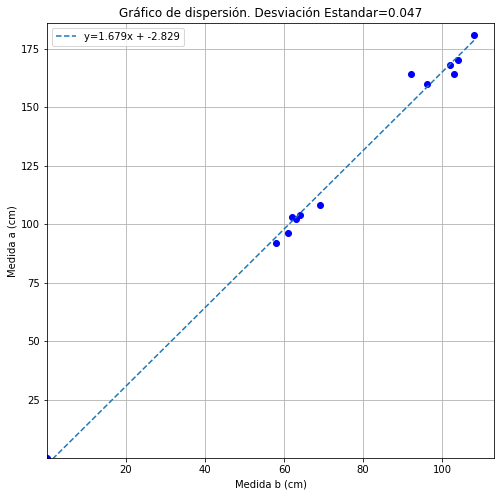

In [7]:
    def lineal(x,m,b):
        return m*x+b
    def graf_Ajuste(x,pars):
        y=pars[0]*x+pars[1]
        return y
    clear_output()
    Sig=pwd.Button(description='Siguiente')
    Sig.on_click(Siguiente1)
    Ant=pwd.Button(description='Anterior')
    Ant.on_click(Main_Pag)
    box=pwd.HBox([Ant,Sig])
    display(box)
    Med_A=[0,170,164,181,160,168,164,104,103,108,96,102,92]
    Med_B=[0,104,103,108,96,102,92,64,62,69,61,63,58]
    fig=plt.figure(figsize=(8,8))
    pars, cov = curve_fit(lineal, Med_B, Med_A, p0=[0, 0], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov))
    x=np.linspace(0,max(Med_B),100)
    etiqueta='y='+str(round(pars[0],3))+'x + '+str(round(pars[1],3))
    ax=fig.add_subplot(111,title='Gráfico de dispersión. Desviación Estandar='+str(round(stdevs[0],3)),xlim=(0.1,max(Med_B)+5),ylim=(0.1,max(Med_A)+5))
    ax.plot(Med_B,Med_A,'bo')
    ax.plot(x,graf_Ajuste(x,pars),'--',label=etiqueta)
    ax.grid()
    ax.legend()
    ax.set_xlabel('Medida b (cm)')
    ax.set_ylabel('Medida a (cm)')
    plt.savefig("Gráfica_de_Dispersión.png", dpi=150)

In [8]:
cov

array([[ 2.19329293e-03, -1.65677998e-01],
       [-1.65677998e-01,  1.43286175e+01]])

In [9]:
np.diag(cov)

array([2.19329293e-03, 1.43286175e+01])

In [10]:
np.sqrt(np.diag(cov))

array([0.04683261, 3.78531604])

In [11]:
x=[3.061616997868383e-16,
 1.617550892092725,
 -0.12332110786759268,
 -4.2252233744829235,
 0.6449737787110889,
 11.012141264159135,
 -2.528051366358241,
 -28.63621179001631,
 8.801453921774355,
 74.29640855683066,
 -28.70585099305458]

In [13]:
suma=0
for i in range(len(x)):
    suma=suma+x[i]
media=suma/len(x)
suma2=0
for elem in x:
    suma2=suma2+(elem-media)**2
varianza=suma2/len(x)
print(varianza)

663.2773273038207


In [14]:
DE=varianza**(1/2)
print(DE)

25.754171066136465
